# Case study on Python Flask


Using the iris dataset, create a web application to take feature inputs from the user
in a web page and print to which species it is classified.

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df = pd.DataFrame(pd.read_excel('F:\\pythonprogramming\\iris_python_flask.xls'))
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [92]:
# to display stats about data
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [93]:
# to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [94]:
# to display no. of samples on each class
df['Classification'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64

Preprocessing 

In [95]:
# check for null values
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

Exploratory Data Analysis

<AxesSubplot:>

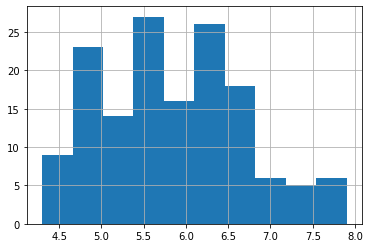

In [96]:
#plotting histogram
df['SL'].hist()

<AxesSubplot:>

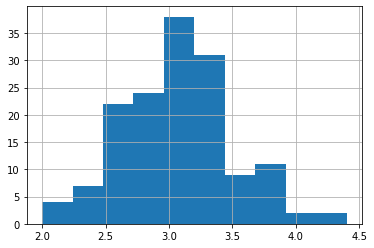

In [97]:
df['SW'].hist()

<AxesSubplot:>

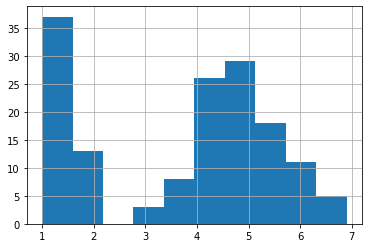

In [98]:
df['PL'].hist()

<AxesSubplot:>

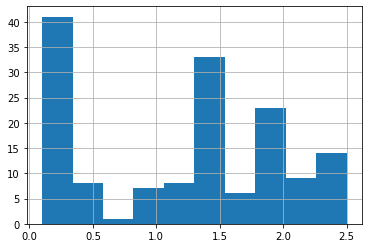

In [99]:
df['PW'].hist()

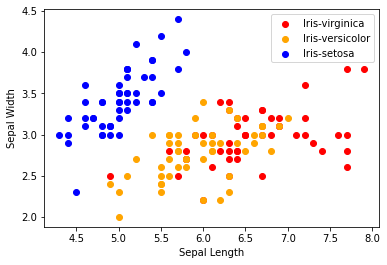

In [100]:
# scatterplot
colors = ['red', 'orange', 'blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['SW'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

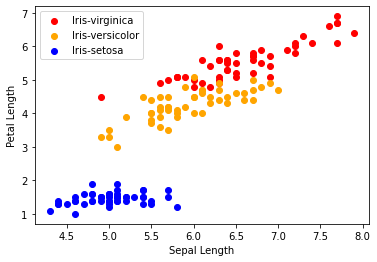

In [101]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['PL'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()

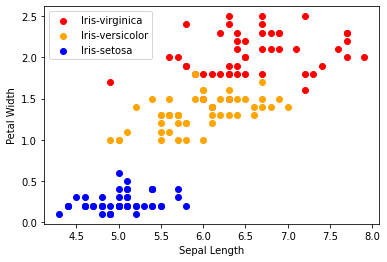

In [102]:
for i in range(3):
    x = df[df['Classification'] == species[i]]
    plt.scatter(x['SL'], x['PW'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width")
plt.legend()

In [103]:
df.corr()

,SL,SW,PL,PW
SL,1.000000,-0.109369,0.871754,0.817954
SW,-0.109369,1.000000,-0.420516,-0.356544
PL,0.871754,-0.420516,1.000000,0.962757
PW,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

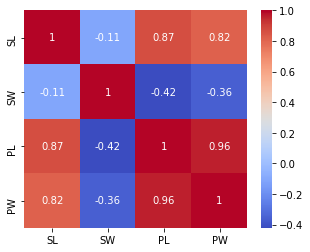

In [104]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

Label Encoder

In [105]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [106]:
df['Classification'] = label.fit_transform(df['Classification'])
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Modelling

In [107]:
from sklearn.model_selection import train_test_split
x=df.drop(['Classification'],axis=1)
y=pd.DataFrame(df['Classification'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

Logistic Regression 

In [108]:

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
# model training
regressor.fit(x_train, y_train)

C:\Users\Revathi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Revathi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [109]:
#  performance
print("Accuracy: ",regressor.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


KNN

In [110]:

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
# model training
classifier.fit(x_train, y_train)

C:\Users\Revathi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [111]:
# performance
print("Accuracy: ",classifier.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


 Decision tree

In [112]:

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# model training
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [113]:
# performance
print("Accuracy: ",tree.score(x_test, y_test) * 100)

Accuracy:  97.77777777777777


Logistic Regression is preferred because of its high accuracy

In [114]:
#Saving the model

import pickle
filename = 'model.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [115]:
x_test.head()

,SL,SW,PL,PW
135,7.7,3.0,6.1,2.3
74,6.4,2.9,4.3,1.3
53,5.5,2.3,4.0,1.3
30,4.8,3.1,1.6,0.2
102,7.1,3.0,5.9,2.1


In [116]:
#Loading the model
load_model = pickle.load(open(filename, 'rb'))

In [117]:
load_model.predict([[4.5,2.3,1.3,0.3]])

array([0])